### read to dataframe

In [4]:
import pandas as pd

scat = pd.read_csv('./test-data/ScatMieData.csv', skiprows=4)
scat.Cos_theta

0     1.000
1     0.875
2     0.750
3     0.625
4     0.500
5     0.375
6     0.250
7     0.125
8     0.000
9    -0.125
10   -0.250
11   -0.375
12   -0.500
13   -0.625
14   -0.750
15   -0.875
16   -1.000
Name: Cos_theta, dtype: float64

In [5]:
head = pd.read_csv('./test-data/ScatMieData.csv', nrows=4, header=None)
head

,0,1,2
0,Wavelength [vacuum] (nm) = 532,NaN,NaN
1,Refractive index of solvent = 1.33,NaN,NaN
2,Refractive index of particles = 1.59,NaN,NaN
3,Diameter of particles (microns) = 0.5,NaN,NaN


In [11]:
head = pd.read_table('./test-data/ScatMieData.csv',
                     sep='=', 
                     comment=',',
                     nrows=4,
                     names=['property', 'value']
                    )
head.value

0    532.00
1      1.33
2      1.59
3      0.50
Name: value, dtype: float64

### plot from dataframe

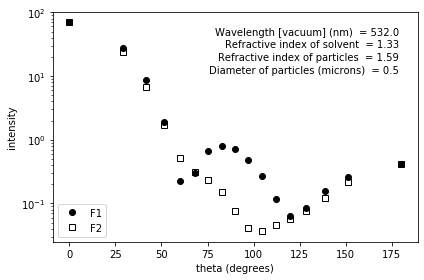

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

header_rows = 4
head = pd.read_table('./test-data/ScatMieData.csv', sep='=', nrows=header_rows,
                    comment=',', header=None)
scat = pd.read_csv('./test-data/ScatMieData.csv', skiprows=header_rows)

theta = (180./np.pi)*np.arccos(scat.Cos_theta)

fig, ax = plt.subplots(figsize=(6,4))
ax.semilogy(theta, scat.F1, 'o', color='black', label='F1')
ax.semilogy(theta, scat.F2, 's', mec='black', mfc='white', zorder=-1, label='F2')

ax.legend(loc='lower left')
ax.set_xlabel('theta (degrees)')
ax.set_ylabel('intensity')

for i in range(header_rows):
    ax.text(0.95, 0.9-i/18, f'{head[0][i]} = {head[1][i]}',
           ha='right', fontsize=10, transform=ax.transAxes)
    
fig.tight_layout()

### read space separated files

In [24]:
import pandas as pd
planets = pd.read_table('./test-data/planetData.txt', sep='\s+', index_col='planet')
print(planets)
print(planets.distance.Saturn)

         distance      mass  gravity  diameter    year
planet                                                
Mercury      0.39    0.0550    0.380      0.38    0.24
Venus        0.72    0.8200    0.910      0.95    0.62
Earth        1.00    1.0000    1.000      1.00    1.00
Mars         1.52    0.1100    0.380      0.53    1.88
Jupiter      5.20  318.0000    2.360     11.20   11.90
Saturn       9.58   95.0000    0.920      9.45   29.00
Uranus      19.20   15.0000    0.890      4.01   84.00
Neptune     30.00   17.0000    1.120      3.88  164.00
Pluto       39.50    0.0024    0.071      0.19  248.00
9.58


## series

In [32]:
import pandas as pd
pd.Series([160.0 - 4.9*t*t for t in range(6)])
heights = pd.Series([188, 157, 173, 169, 155], index=['Jake', 'Sarah', 'Heather', 'Chris', 'Alex'])

htd = heights.to_dict()
pd.Series(htd)

Jake       188
Sarah      157
Heather    173
Chris      169
Alex       155
dtype: int64

### time series

In [2]:
import pandas as pd
dtr = pd.date_range('2019-09-09', periods=6)
pd.Series([160.0-4.9*t*t for t in range(6)], index=dtr)

2019-09-09    160.0
2019-09-10    155.1
2019-09-11    140.4
2019-09-12    115.9
2019-09-13     81.6
2019-09-14     37.5
Freq: D, dtype: float64

### loc

In [7]:
import pandas as pd
planets = pd.read_table('./test-data/planetData.txt',
                        sep='\s+', index_col='planet')
planets.loc[(planets['mass'] > 1.0) &
            (planets['gravity'] < 1.0),
            'mass': 'gravity']

,mass,gravity
planet,,
Saturn,95.0,0.92
Uranus,15.0,0.89


### DataFrame()

In [12]:
import pandas as pd
optmat = {
    'mat': ['silica', 'titania', 'PMMA', 'PS'],
    'index': [1.24, 2.40, 1.49, 1.59],
    'density': [2.03, 4.2, 1.19, 1.05]
}
omdf = pd.DataFrame(optmat)
omdf

,mat,index,density
0,silica,1.24,2.03
1,titania,2.40,4.20
2,PMMA,1.49,1.19
3,PS,1.59,1.05


In [18]:
omdf = pd.DataFrame(
    index=['silica', 'titania', 'PMMA', 'PS'],
    columns={'density', 'index'}
)
omdf.loc['PS', ('index', 'density')] = (1.05, 1.59)
omdf[['index', 'density']] = omdf[['index', 'density']].apply(pd.to_numeric)
omdf.dtypes

index      float64
density    float64
dtype: object

### read URL

In [32]:
import pandas as pd

url = 'http://www.bankofcanada.ca/valet/observations/group/FX_RATES_DAILY/csv?start_date=2017-01-03'
rates = pd.read_csv(url, skiprows=39, index_col='date')
rates.index = pd.to_datetime(rates.index)
days, currencies = rates.shape
codes = pd.read_csv(url, skiprows=10, usecols=[0,2], nrows=currencies)

for i in range(currencies):
    codes.iloc[i, 1] = codes.iloc[i, 1].split( ' to Canadian')[0]
date = rates.index[-1]
print(f'Currency Value on {date}')
for (code, rate) in zip(codes.iloc[:,1], rates.loc[date]):
    print(f'{code:20s} Con$ {rate:8.6g}')

Currency Value on 2019-09-10 00:00:00
Australian dollar    Con$   0.9023
Brazilian real       Con$   0.3205
Chinese renminbi     Con$    0.185
European euro        Con$   1.4522
Hong Kong dollar     Con$   0.1678
Indian rupee         Con$  0.01829
Indonesian rupiah    Con$  9.4e-05
Japanese yen         Con$  0.01225
Malaysian ringgit    Con$   0.3153
Mexican peso         Con$  0.06736
New Zealand dollar   Con$   0.8443
Norwegian krone      Con$   0.1468
Peruvian new sol     Con$   0.3931
Russian ruble        Con$   0.0201
Saudi riyal          Con$   0.3506
Singapore dollar     Con$   0.9534
South African rand   Con$  0.08965
South Korean won     Con$ 0.001103
Swedish krona        Con$   0.1356
Swiss franc          Con$   1.3274
Taiwanese dollar     Con$  0.04212
Thai baht            Con$  0.04296
Turkish lira         Con$   0.2278
UK pound sterling    Con$   1.6249
US dollar            Con$   1.3153
Vietnamese dong      Con$  5.7e-05


### extract info from dataframe

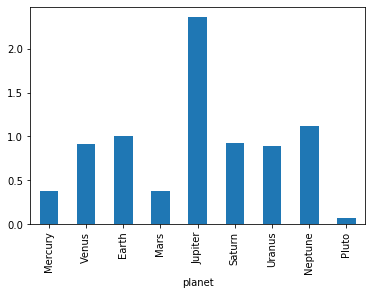

In [60]:
import pandas as pd
import numpy as np

planets = pd.read_table('./test-data/planetData.txt',
                        sep='\s+', index_col='planet')
planets.sort_values(by='mass', ascending=False)
planets[planets['gravity'] > 1]
planets['volume'] = np.pi* planets['diameter'] ** 3 / 6.0
planets.distance.median()
planets['gravity'].plot.bar(color='C0')


### group by

In [61]:
import pandas as pd

ewr = pd.read_csv('./test-data/ewrFlights20180516.csv')
ewr.head()

,Destination,Airline,Flight,Departure,Terminal,Status,Arrival_time,A_day,Scheduled,S_day
0,Baltimore (BWI),Southwest Airlines,WN 8512,12:09 AM,NaN,Landed,NaN,NaN,NaN,NaN
1,Baltimore (BWI),Mountain Air Cargo,C2 7304,12:10 AM,NaN,Unknown,NaN,NaN,NaN,NaN
2,Paris (ORY),Norwegian Air Shuttle,DY 7192,12:30 AM,B,Landed,1:48 PM,NaN,1:35 PM,NaN
3,Paris (ORY),euroAtlantic Airways,YU 7192,12:30 AM,B,Landed,1:48 PM,NaN,1:35 PM,NaN
4,Rockford (RFD),UPS,5X 108,12:48 AM,NaN,Unknown,NaN,NaN,NaN,NaN


In [63]:
ewr['Status'].value_counts()

Landed - On-time       757
Landed - Delayed       720
Canceled                41
Landed                  18
En Route - Delayed      10
Unknown                  4
Scheduled - Delayed      2
En Route - On-time       1
Diverted                 1
En Route                 1
Name: Status, dtype: int64

In [64]:
ewr['Status'].groupby(ewr['Terminal']).value_counts()

Terminal  Status             
A         Landed - On-time       229
          Landed - Delayed       218
          Canceled                21
          Landed                   3
B         Landed - On-time       104
          Landed - Delayed        70
          En Route - Delayed       6
          Canceled                 4
          Landed                   4
          Scheduled - Delayed      2
          En Route - On-time       1
C         Landed - Delayed       413
          Landed - On-time       395
          Canceled                14
          En Route - Delayed       4
Name: Status, dtype: int64

In [70]:
ot = []
for airln, grp in ewr.groupby(ewr['Airline']):
    # print(f'\nairln = {airln}: \ngrp:\n{grp}')
    ontime = grp.Status[grp.Status == 'Landed - On-time'].count()
    delayed = grp.Status[grp.Status == 'Landed - Delayed'].count()
    tot1 = ontime + delayed
    if tot1 >= 12:
        ot.append([airln, tot1, ontime/tot1])
t = pd.DataFrame.from_records(ot, columns=[
    'Airline', 'Flights Landed', 'On-time fraction'])
t

,Airline,Flights Landed,On-time fraction
0,Air Canada,129,0.472868
1,Air China,24,0.750000
2,Air New Zealand,34,0.617647
3,Alaska Airlines,20,0.500000
4,American Airlines,27,0.592593
5,Austrian,28,0.428571
6,Brussels Airlines,21,0.523810
7,CommutAir,47,0.531915
8,Copa Airlines,12,0.333333
9,Delta Air Lines,33,0.606061


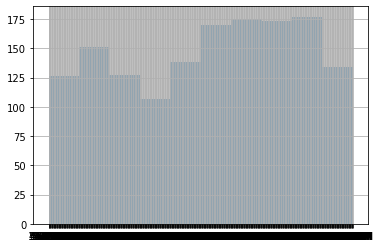

In [78]:
ewr.Arrival_time.hist()